In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# 맥 한글 버전 설치 
plt.rc("font",family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

import pandas as pd 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amcquistan/WeatherPredictPythonML/master/end-part2_df.csv",index_col='date')
print(data.shape)

(997, 39)


In [4]:
df_2016 = data.filter(like='2016',axis=0)
# 날짜에서 월 추출 
df_2016.reset_index(inplace=True)
df_2016['month'] = df_2016['date'].apply(lambda x: x.split("-")[1])
print(df_2016['month'].unique())

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


/var/folders/nh/696b27gd4jj8263vhs_h7btm0000gn/T/ipykernel_7952/4138835923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['month'] = df_2016['date'].apply(lambda x: x.split("-")[1])


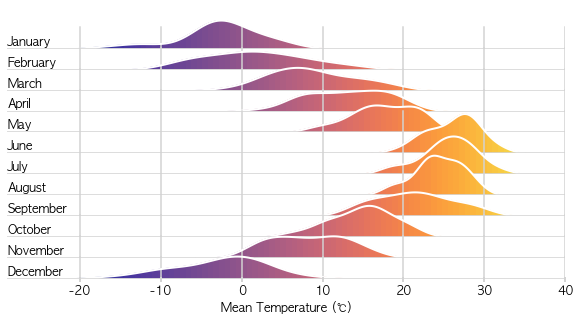

In [37]:
# 시각화 
import calendar
import cmocean as cmo 
import numpy as np
import matplotlib
fig,axes = plt.subplots(nrows=12,figsize=[10,5],sharex=True, sharey=True)
fig.set_facecolor("none")

x = np.linspace(0,1,100)
for i,ax in enumerate(axes,1):
    sns.kdeplot(df_2016.query(f'month=="{i:02d}"')['meantempm'],fill=True,color='w',alpha=0,linewidth=2, legend=False,ax=ax)
    ax.set_xlim(-29,40)

    # 밀도 함수에 gradient 추가 
    im = ax.imshow(np.vstack([x,x]),cmap='cmo.thermal',aspect='auto',extent=[*ax.get_xlim(),*ax.get_ylim()])
    path = ax.collections[0].get_paths()[0]
    patch= matplotlib.patches.PathPatch(path,transform= ax.transData)
    im.set_clip_path(patch)

    ax.text(-29,0.01,calendar.month_name[i],fontdict={'fontsize':'large'})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i !=12:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x',direction='inout',color='lightgray',length=5,width=2,labelsize='large')
        ax.set_xlabel("Mean Temperature (℃)", fontdict={"fontsize":"large"})

    ax.set_yticks([])
    ax.set_ylabel("")

    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)
        
    ax.axhline(0, color="lightgray")
    ax.set_facecolor("none")
fig.subplots_adjust(hspace=-0.5)